In [13]:
!pip install nltk
!pip install wordcloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from query import top_mentioned_stocks, tweet_headline_sentiment, connect

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Function to preprocess tweet text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and lowercase all tokens
    tokens = [token.lower() for token in tokens if token.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return " ".join(tokens)

# Function to generate word cloud for the most mentioned stock
def generate_word_cloud(stock_symbol):
    # Connect to the database
    engine = connect()

    # Retrieve tweets associated with the most mentioned stock
    query = f"""
        SELECT th.content
        FROM Tweet_Headline th
        JOIN Company c ON th.company_id = c.company_id
        WHERE c.ticker_symbol = '{stock_symbol}'
    """
    tweets_df = pd.read_sql(query, engine)
    engine.dispose()

    # Concatenate all tweet texts into a single string
    tweet_text = " ".join(tweets_df['content'].apply(preprocess_text))

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tweet_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Tweets of {stock_symbol}")
    plt.axis('off')
    plt.show()

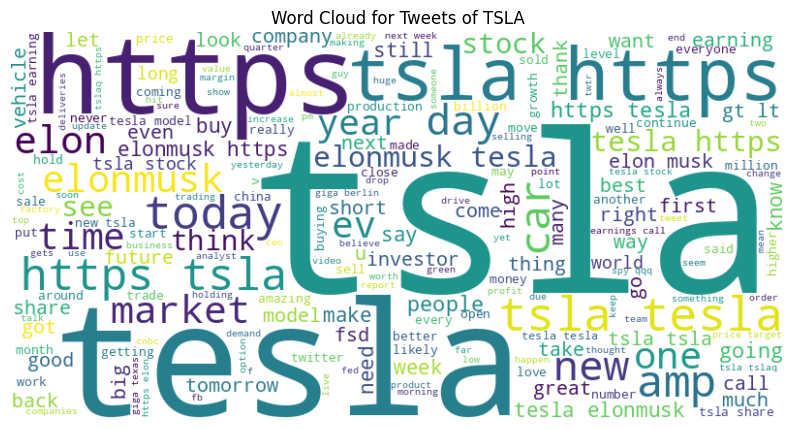

In [14]:
top_stocks_df = top_mentioned_stocks()
most_mentioned_stock = top_stocks_df.iloc[0]['stock_symbol']  # Assuming the most mentioned stock is the first one

# Generate word cloud for the most mentioned stock
generate_word_cloud(most_mentioned_stock)